In [25]:
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import scipy.optimize as spo

DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

def pow_func(r, A, alpha):
    return A * np.power(r, -alpha)

408.5


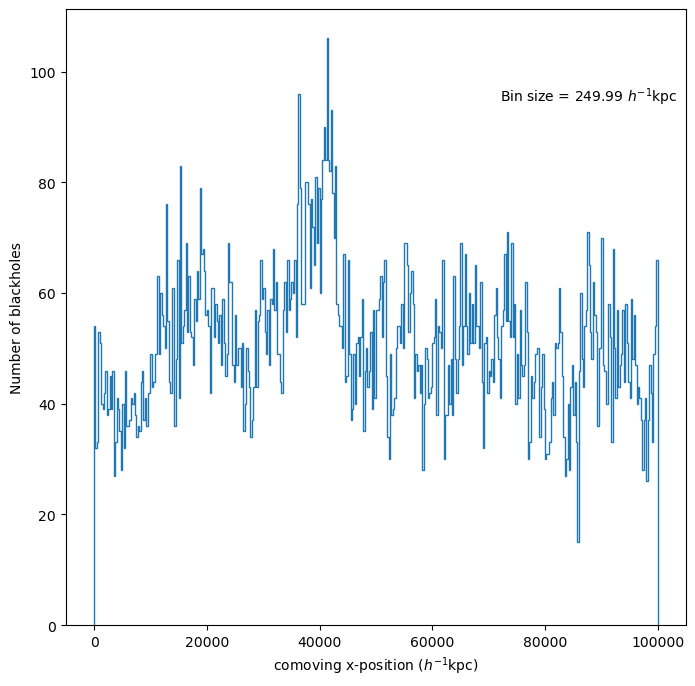

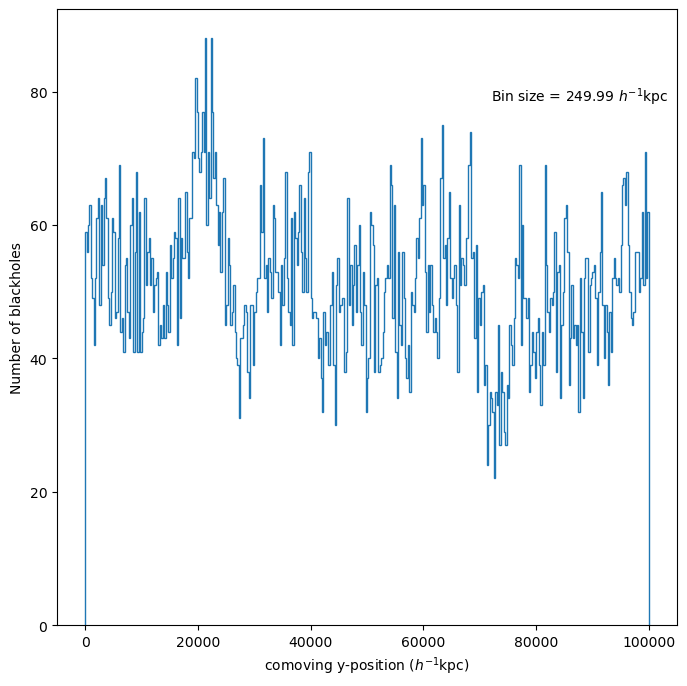

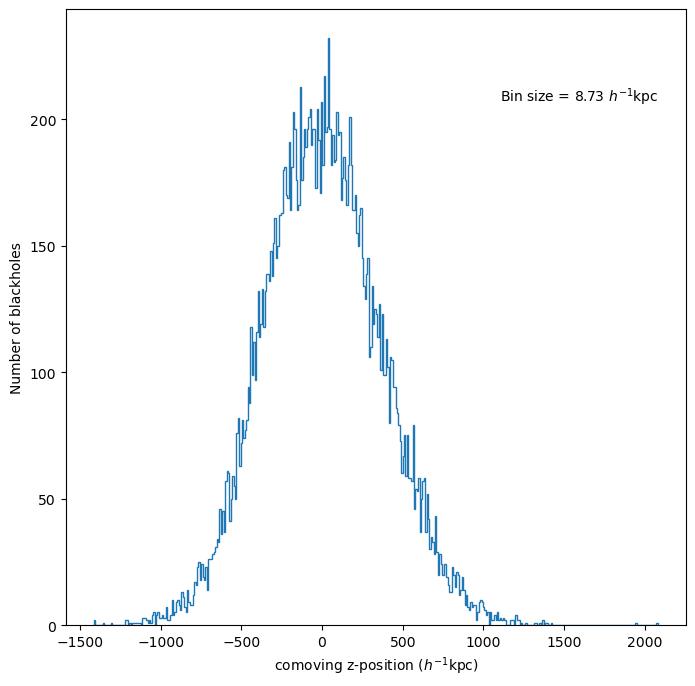

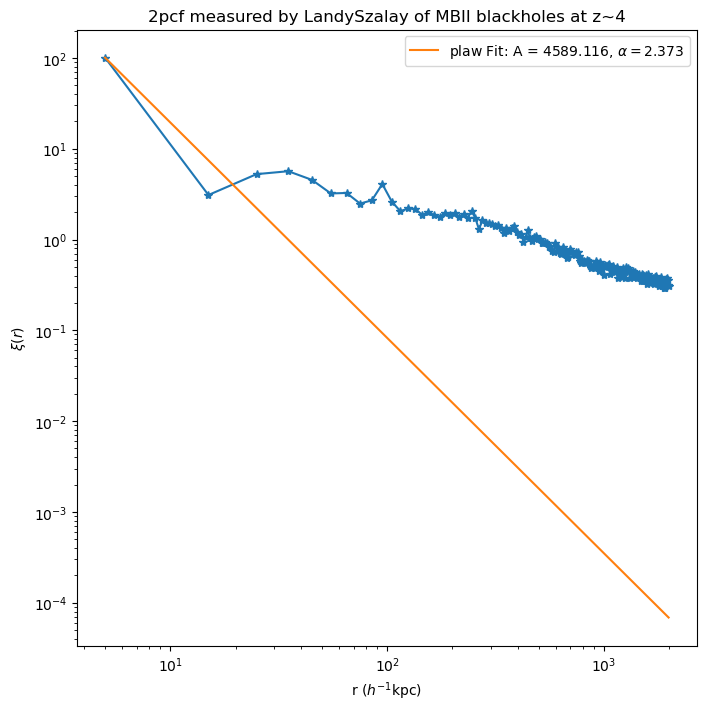

In [49]:
MBII_z4_filename = "bhprops_034.txt"
MBII_z4 = np.loadtxt(DATA_DIRECTORY + MBII_z4_filename)

bh_pos_x = np.copy(MBII_z4[:, 2])
bh_pos_y = np.copy(MBII_z4[:, 3])
bh_pos_z = np.copy(MBII_z4[:, 4])
print(len(bh_pos_x)/50)

n_bins = 400
fig, ax = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_x, bins=n_bins, histtype='step')[0];
ax.set_xlabel(r'comoving x-position ($h^{-1}$kpc)')
ax.set_ylabel(r'Number of blackholes')
ax.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_x) - np.min(bh_pos_x))/n_bins, 2)), transform = ax.transAxes)

fig2, ax2 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_y, bins=n_bins, histtype='step')[0];
ax2.set_xlabel(r'comoving y-position ($h^{-1}$kpc)')
ax2.set_ylabel(r'Number of blackholes')
ax2.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_y) - np.min(bh_pos_y))/n_bins, 2)), transform = ax2.transAxes)

fig3, ax3 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_z, bins=n_bins, histtype='step')[0];
ax3.set_xlabel(r'comoving z-position ($h^{-1}$kpc)')
ax3.set_ylabel(r'Number of blackholes')
ax3.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_z) - np.min(bh_pos_z))/n_bins, 2)), transform = ax3.transAxes)

mult = 100
n_D = len(bh_pos_x)
n_rand = mult * n_D
rand_x = np.random.uniform(np.min(bh_pos_x), np.max(bh_pos_x), n_rand)
rand_y = np.random.uniform(np.min(bh_pos_y), np.max(bh_pos_y), n_rand)

#-------------------------------------------------------------------------------------------
#Drawing random numbers for z from smoothed distribution of the data z vals
z_bin_size = 5

z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
z_bin_mid = (z_bin + z_bin_size/2)[:-1]
kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
log_dens = kde.score_samples(z_bin_mid)
pdf = np.exp(log_dens)
# ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
cdf = np.cumsum(pdf)
cdf = cdf / np.max(cdf)
cdf = np.insert(cdf, 0, 0)

z_bin = z_bin.flatten()
z_bin_mid = z_bin_mid.flatten()

uni_val = np.random.rand(n_rand)
bin_indices = np.searchsorted(cdf, uni_val)
bin_edges = z_bin[bin_indices - 1]
bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
rand_z = bin_edges + bin_weights * bin_diff

#-------------------------------------------------------------------------------------------
bin_size = 10

bins = np.arange(0, 2000, bin_size)
bin_mids = (bins[0:-1] + bins[1:])/2

result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

DD_norm = (n_D * (n_D - 1))/2
RR_norm = (n_rand * (n_rand - 1))/2
DR_norm = n_D * n_rand

DD_count = result_DD['npairs']/2
RR_count = result_RR['npairs']/2
DR_count = result_DR['npairs']

LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(bin_mids, LandSzal2pcf, '-*')
ax.set_xlabel(r'r ($h^{-1}$kpc)')
ax.set_ylabel(r'$\xi(r)$')
ax.set_title("2pcf measured by LandySzalay of MBII blackholes at z~4")
ax.set_xscale('log')
ax.set_yscale('log')

temp_popt, temp_pcov = spo.curve_fit(pow_func, bin_mids, LandSzal2pcf)
_2pcf_fit_alpha = temp_popt[1]
_2pcf_fit_A = temp_popt[0]
ax.plot(bin_mids, pow_func(bin_mids, _2pcf_fit_A, _2pcf_fit_alpha), label=r"plaw Fit: A = {}, $\alpha = {}$".format(np.round(_2pcf_fit_A, 3), np.round(_2pcf_fit_alpha,3)))
ax.legend()

In [40]:
_2pcf_fit_alpha

0.8603498168393288

## Data at z ~ 5

160.72


/tmp/ipykernel_10026/1895688882.py:11: RuntimeWarning: overflow encountered in power
  return A * np.power(r, -alpha)
/tmp/ipykernel_10026/1895688882.py:11: RuntimeWarning: overflow encountered in multiply
  return A * np.power(r, -alpha)


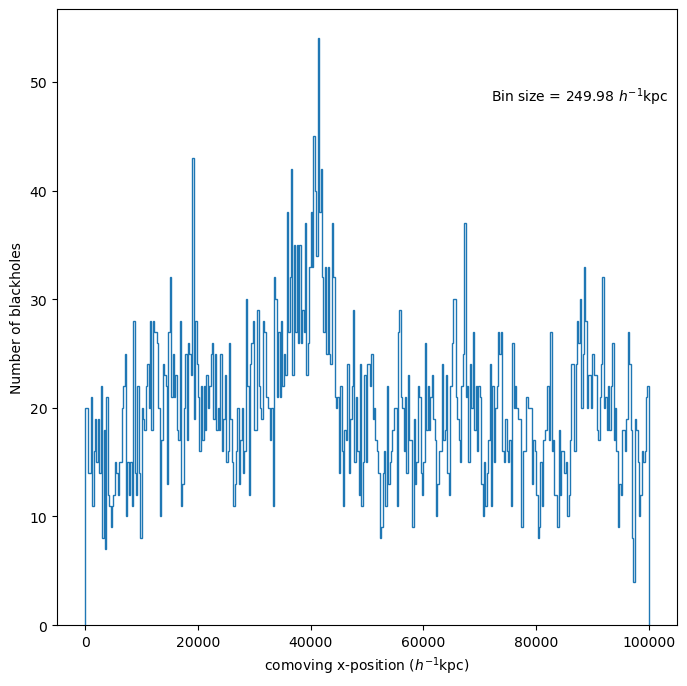

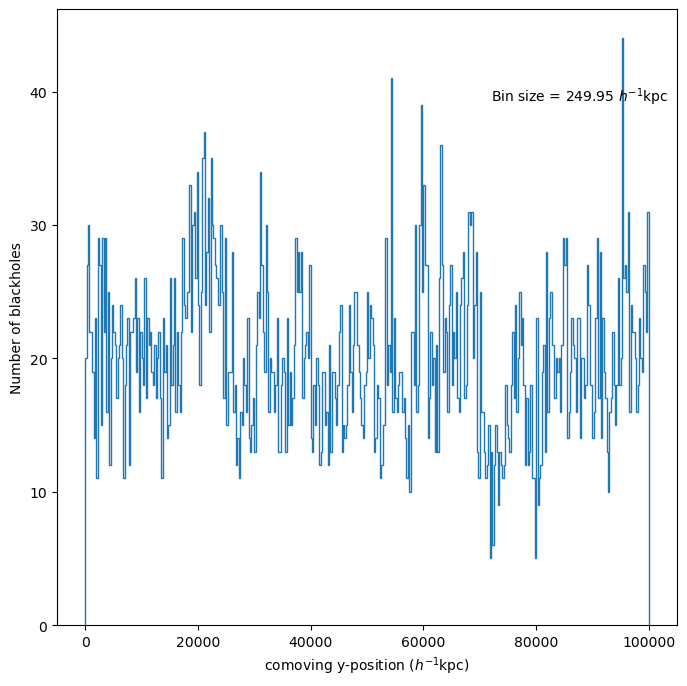

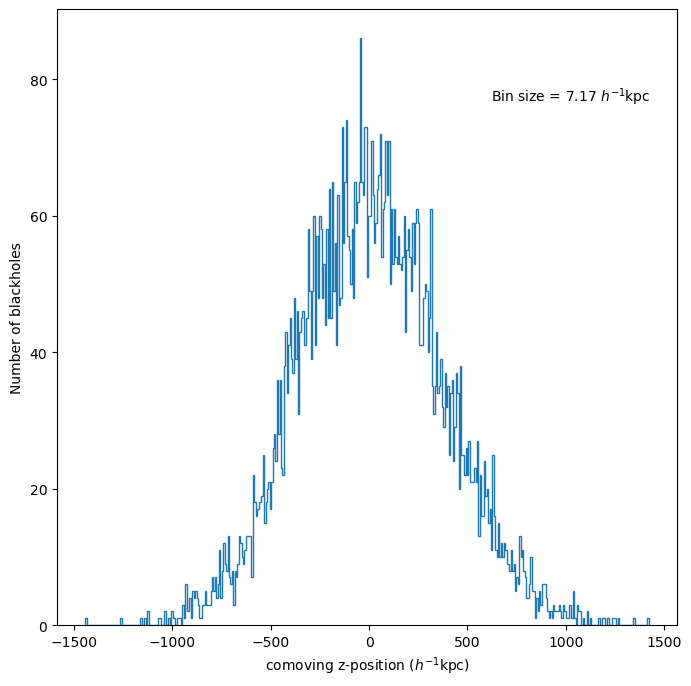

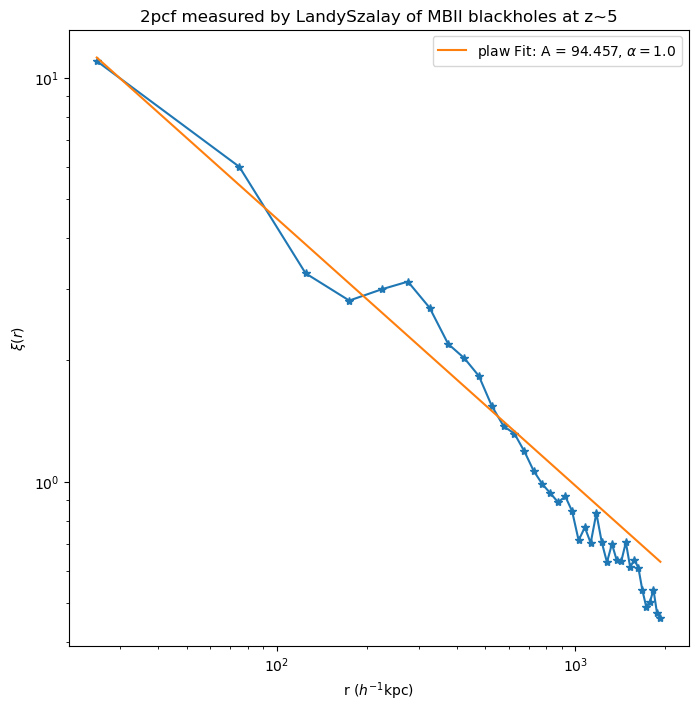

In [31]:
MBII_z5_filename = "bhprops_029.txt"
MBII_z5 = np.loadtxt(DATA_DIRECTORY + MBII_z5_filename)
redshift = 5

bh_pos_x = np.copy(MBII_z5[:, 2])
bh_pos_y = np.copy(MBII_z5[:, 3])
bh_pos_z = np.copy(MBII_z5[:, 4])
print(len(bh_pos_x)/50)

n_bins = 400
fig, ax = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_x, bins=n_bins, histtype='step')[0];
ax.set_xlabel(r'comoving x-position ($h^{-1}$kpc)')
ax.set_ylabel(r'Number of blackholes')
ax.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_x) - np.min(bh_pos_x))/n_bins, 2)), transform = ax.transAxes)

fig2, ax2 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_y, bins=n_bins, histtype='step')[0];
ax2.set_xlabel(r'comoving y-position ($h^{-1}$kpc)')
ax2.set_ylabel(r'Number of blackholes')
ax2.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_y) - np.min(bh_pos_y))/n_bins, 2)), transform = ax2.transAxes)

fig3, ax3 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_z, bins=n_bins, histtype='step')[0];
ax3.set_xlabel(r'comoving z-position ($h^{-1}$kpc)')
ax3.set_ylabel(r'Number of blackholes')
ax3.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_z) - np.min(bh_pos_z))/n_bins, 2)), transform = ax3.transAxes)

mult = 10
n_D = len(bh_pos_x)
n_rand = mult * n_D
rand_x = np.random.uniform(np.min(bh_pos_x), np.max(bh_pos_x), n_rand)
rand_y = np.random.uniform(np.min(bh_pos_y), np.max(bh_pos_y), n_rand)

#-------------------------------------------------------------------------------------------
#Drawing random numbers for z from smoothed distribution of the data z vals
z_bin_size = 5

z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
z_bin_mid = (z_bin + z_bin_size/2)[:-1]
kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
log_dens = kde.score_samples(z_bin_mid)
pdf = np.exp(log_dens)
# ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
cdf = np.cumsum(pdf)
cdf = cdf / np.max(cdf)
cdf = np.insert(cdf, 0, 0)

z_bin = z_bin.flatten()
z_bin_mid = z_bin_mid.flatten()

uni_val = np.random.rand(n_rand)
bin_indices = np.searchsorted(cdf, uni_val)
bin_edges = z_bin[bin_indices - 1]
bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
rand_z = bin_edges + bin_weights * bin_diff

#-------------------------------------------------------------------------------------------

bins = np.arange(0, 2000, 50)
bin_mids = (bins[0:-1] + bins[1:])/2

result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

DD_norm = (n_D * (n_D - 1))/2
RR_norm = (n_rand * (n_rand - 1))/2
DR_norm = n_D * n_rand

DD_count = result_DD['npairs']/2
RR_count = result_RR['npairs']/2
DR_count = result_DR['npairs']

LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(bin_mids, LandSzal2pcf, '-*')
ax.set_xlabel(r'r ($h^{-1}$kpc)')
ax.set_ylabel(r'$\xi(r)$')
ax.set_title("2pcf measured by LandySzalay of MBII blackholes at z~{}".format(redshift))
ax.set_xscale('log')
ax.set_yscale('log')

temp_popt, temp_pcov = spo.curve_fit(pow_func, bin_mids, LandSzal2pcf)
_2pcf_fit_alpha = temp_popt[1]
_2pcf_fit_A = temp_popt[0]
ax.plot(bin_mids, pow_func(bin_mids, _2pcf_fit_A, _2pcf_fit_alpha), label=r"plaw Fit: A = {}, $\alpha = {}$".format(np.round(_2pcf_fit_A, 3), np.round(_2pcf_fit_alpha)))
ax.legend()

## Data at z ~ 6

55.42


/tmp/ipykernel_10026/1895688882.py:11: RuntimeWarning: overflow encountered in power
  return A * np.power(r, -alpha)
/tmp/ipykernel_10026/1895688882.py:11: RuntimeWarning: overflow encountered in multiply
  return A * np.power(r, -alpha)


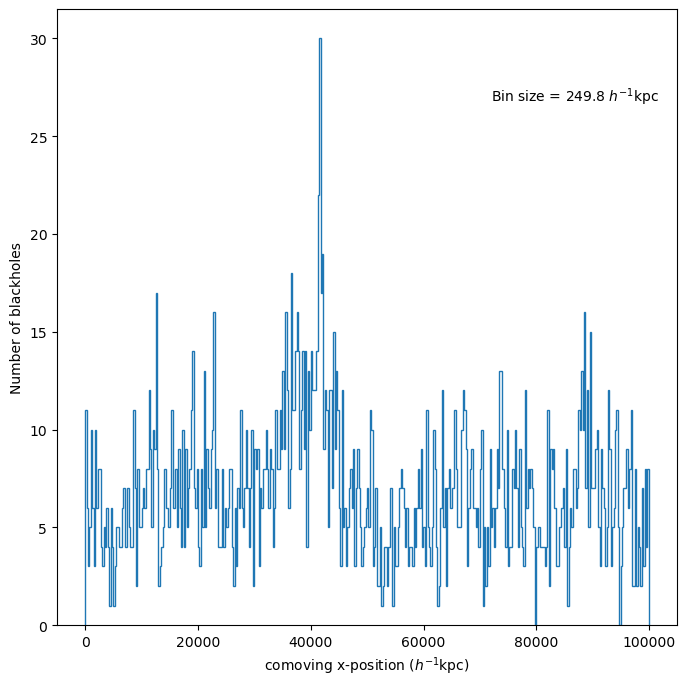

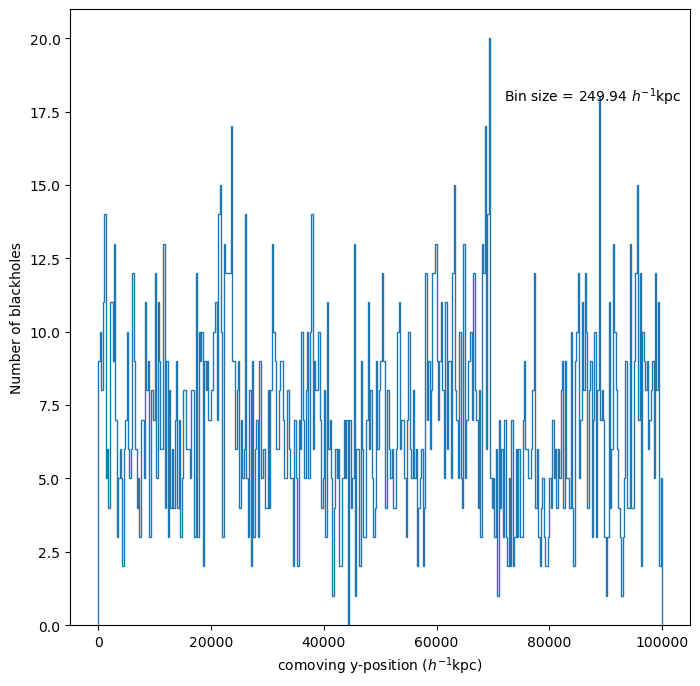

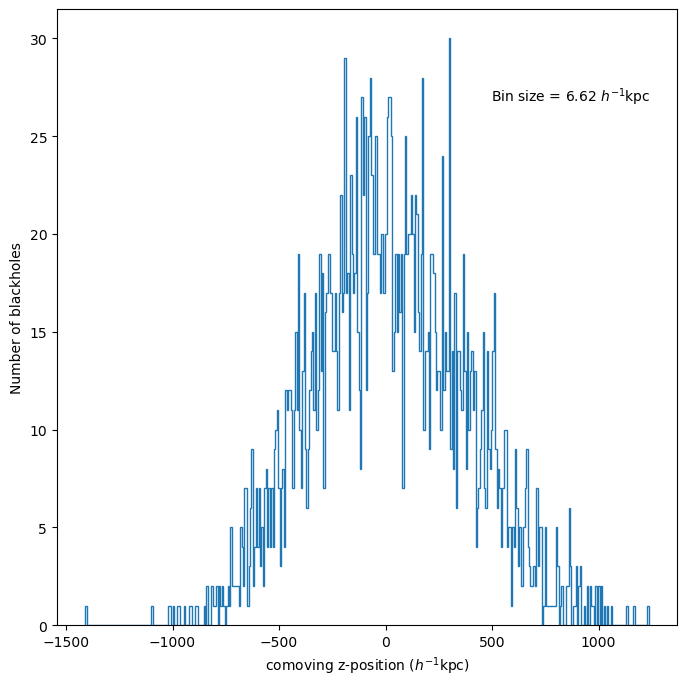

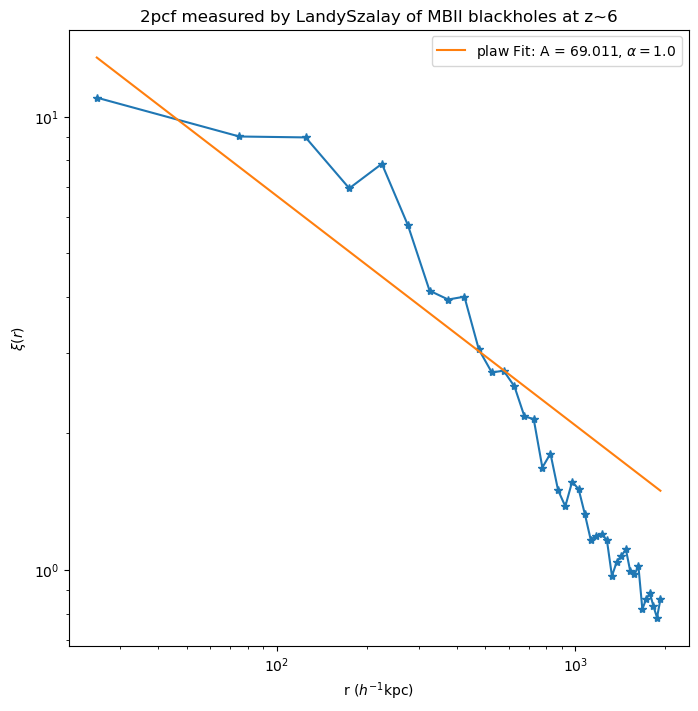

In [32]:
MBII_z6_filename = "bhprops_026.txt"
MBII_z6 = np.loadtxt(DATA_DIRECTORY + MBII_z6_filename)
redshift = 6

bh_pos_x = np.copy(MBII_z6[:, 2])
bh_pos_y = np.copy(MBII_z6[:, 3])
bh_pos_z = np.copy(MBII_z6[:, 4])
print(len(bh_pos_x)/50)

n_bins = 400
fig, ax = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_x, bins=n_bins, histtype='step')[0];
ax.set_xlabel(r'comoving x-position ($h^{-1}$kpc)')
ax.set_ylabel(r'Number of blackholes')
ax.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_x) - np.min(bh_pos_x))/n_bins, 2)), transform = ax.transAxes)

fig2, ax2 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_y, bins=n_bins, histtype='step')[0];
ax2.set_xlabel(r'comoving y-position ($h^{-1}$kpc)')
ax2.set_ylabel(r'Number of blackholes')
ax2.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_y) - np.min(bh_pos_y))/n_bins, 2)), transform = ax2.transAxes)

fig3, ax3 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_z, bins=n_bins, histtype='step')[0];
ax3.set_xlabel(r'comoving z-position ($h^{-1}$kpc)')
ax3.set_ylabel(r'Number of blackholes')
ax3.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_z) - np.min(bh_pos_z))/n_bins, 2)), transform = ax3.transAxes)

mult = 10
n_D = len(bh_pos_x)
n_rand = mult * n_D
rand_x = np.random.uniform(np.min(bh_pos_x), np.max(bh_pos_x), n_rand)
rand_y = np.random.uniform(np.min(bh_pos_y), np.max(bh_pos_y), n_rand)

#-------------------------------------------------------------------------------------------
#Drawing random numbers for z from smoothed distribution of the data z vals
z_bin_size = 5

z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
z_bin_mid = (z_bin + z_bin_size/2)[:-1]
kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
log_dens = kde.score_samples(z_bin_mid)
pdf = np.exp(log_dens)
# ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
cdf = np.cumsum(pdf)
cdf = cdf / np.max(cdf)
cdf = np.insert(cdf, 0, 0)

z_bin = z_bin.flatten()
z_bin_mid = z_bin_mid.flatten()

uni_val = np.random.rand(n_rand)
bin_indices = np.searchsorted(cdf, uni_val)
bin_edges = z_bin[bin_indices - 1]
bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
rand_z = bin_edges + bin_weights * bin_diff

#-------------------------------------------------------------------------------------------

bins = np.arange(0, 2000, 50)
bin_mids = (bins[0:-1] + bins[1:])/2

result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

DD_norm = (n_D * (n_D - 1))/2
RR_norm = (n_rand * (n_rand - 1))/2
DR_norm = n_D * n_rand

DD_count = result_DD['npairs']/2
RR_count = result_RR['npairs']/2
DR_count = result_DR['npairs']

LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(bin_mids, LandSzal2pcf, '-*')
ax.set_xlabel(r'r ($h^{-1}$kpc)')
ax.set_ylabel(r'$\xi(r)$')
ax.set_title("2pcf measured by LandySzalay of MBII blackholes at z~{}".format(redshift))
ax.set_xscale('log')
ax.set_yscale('log')

temp_popt, temp_pcov = spo.curve_fit(pow_func, bin_mids, LandSzal2pcf)
_2pcf_fit_alpha = temp_popt[1]
_2pcf_fit_A = temp_popt[0]
ax.plot(bin_mids, pow_func(bin_mids, _2pcf_fit_A, _2pcf_fit_alpha), label=r"plaw Fit: A = {}, $\alpha = {}$".format(np.round(_2pcf_fit_A, 3), np.round(_2pcf_fit_alpha)))
ax.legend()

## Data at z ~ 7

24.44


/tmp/ipykernel_10026/1895688882.py:11: RuntimeWarning: overflow encountered in power
  return A * np.power(r, -alpha)


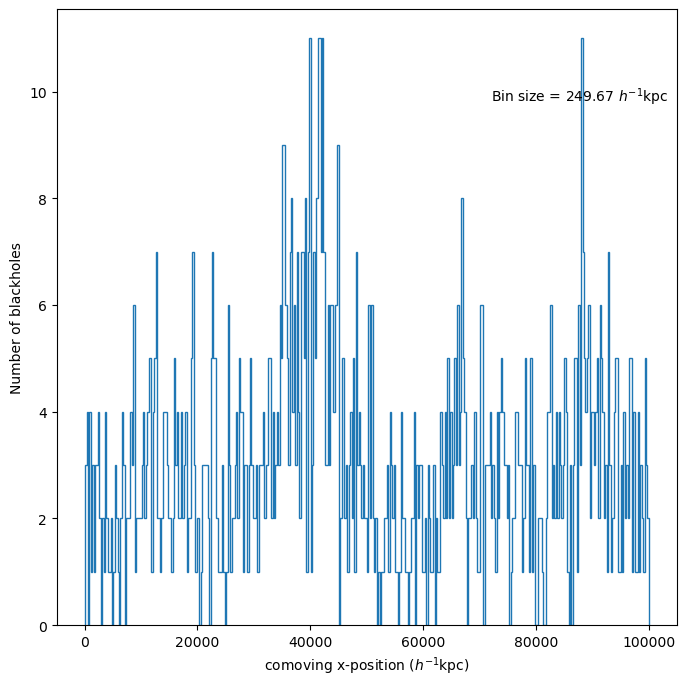

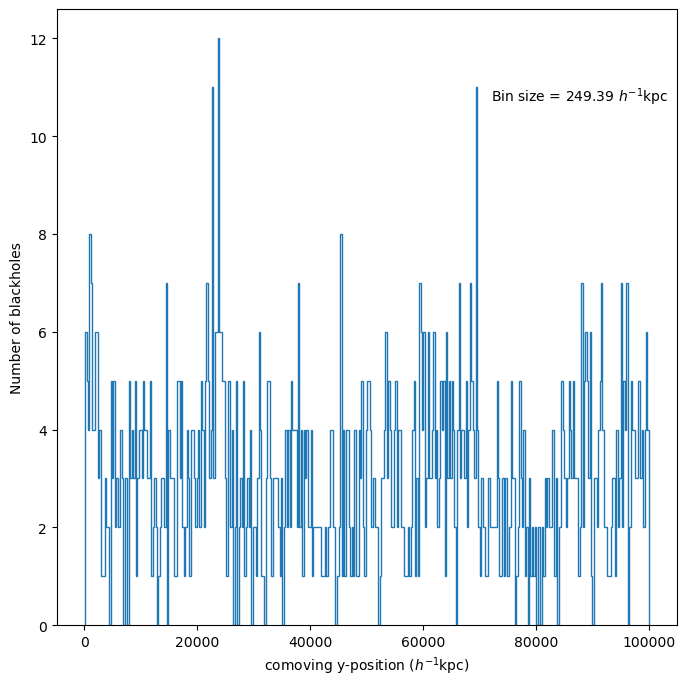

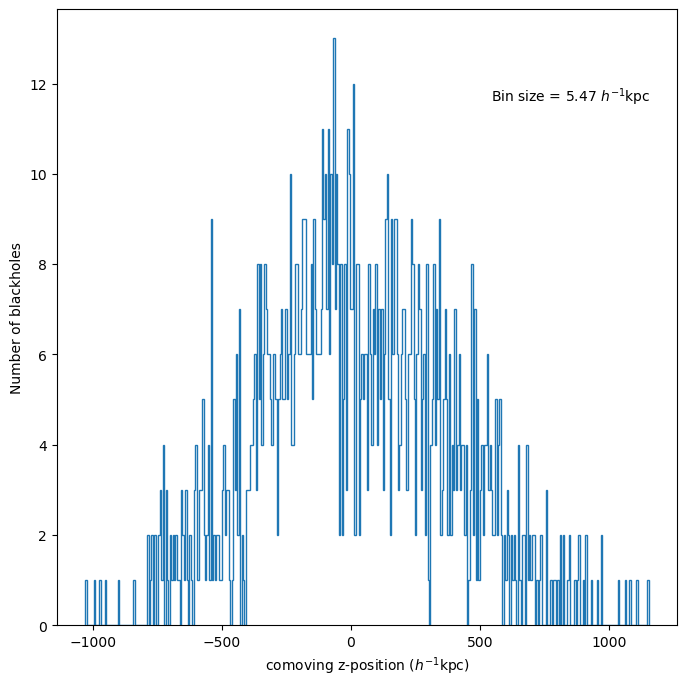

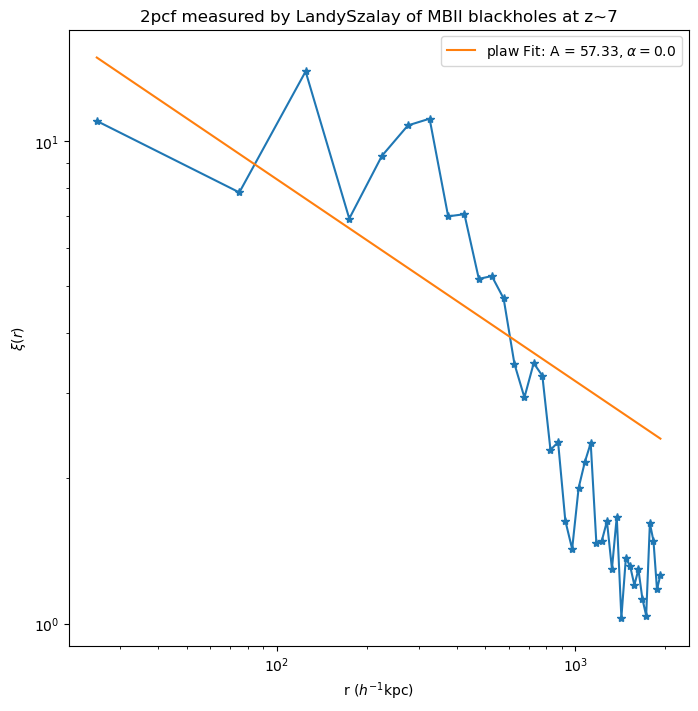

In [33]:
MBII_z6_filename = "bhprops_024.txt"
MBII_z6 = np.loadtxt(DATA_DIRECTORY + MBII_z6_filename)
redshift = 7

bh_pos_x = np.copy(MBII_z6[:, 2])
bh_pos_y = np.copy(MBII_z6[:, 3])
bh_pos_z = np.copy(MBII_z6[:, 4])
print(len(bh_pos_x)/50)

n_bins = 400
fig, ax = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_x, bins=n_bins, histtype='step')[0];
ax.set_xlabel(r'comoving x-position ($h^{-1}$kpc)')
ax.set_ylabel(r'Number of blackholes')
ax.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_x) - np.min(bh_pos_x))/n_bins, 2)), transform = ax.transAxes)

fig2, ax2 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_y, bins=n_bins, histtype='step')[0];
ax2.set_xlabel(r'comoving y-position ($h^{-1}$kpc)')
ax2.set_ylabel(r'Number of blackholes')
ax2.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_y) - np.min(bh_pos_y))/n_bins, 2)), transform = ax2.transAxes)

fig3, ax3 = plt.subplots(figsize = (8,8))
hist_data = plt.hist(bh_pos_z, bins=n_bins, histtype='step')[0];
ax3.set_xlabel(r'comoving z-position ($h^{-1}$kpc)')
ax3.set_ylabel(r'Number of blackholes')
ax3.text(0.70, 0.85, r'Bin size = {} $h^{{-1}}$kpc'.format(np.round((np.max(bh_pos_z) - np.min(bh_pos_z))/n_bins, 2)), transform = ax3.transAxes)

mult = 10
n_D = len(bh_pos_x)
n_rand = mult * n_D
rand_x = np.random.uniform(np.min(bh_pos_x), np.max(bh_pos_x), n_rand)
rand_y = np.random.uniform(np.min(bh_pos_y), np.max(bh_pos_y), n_rand)

#-------------------------------------------------------------------------------------------
#Drawing random numbers for z from smoothed distribution of the data z vals
z_bin_size = 5

z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
z_bin_mid = (z_bin + z_bin_size/2)[:-1]
kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
log_dens = kde.score_samples(z_bin_mid)
pdf = np.exp(log_dens)
# ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
cdf = np.cumsum(pdf)
cdf = cdf / np.max(cdf)
cdf = np.insert(cdf, 0, 0)

z_bin = z_bin.flatten()
z_bin_mid = z_bin_mid.flatten()

uni_val = np.random.rand(n_rand)
bin_indices = np.searchsorted(cdf, uni_val)
bin_edges = z_bin[bin_indices - 1]
bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
rand_z = bin_edges + bin_weights * bin_diff

#-------------------------------------------------------------------------------------------

bins = np.arange(0, 2000, 50)
bin_mids = (bins[0:-1] + bins[1:])/2

result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

DD_norm = (n_D * (n_D - 1))/2
RR_norm = (n_rand * (n_rand - 1))/2
DR_norm = n_D * n_rand

DD_count = result_DD['npairs']/2
RR_count = result_RR['npairs']/2
DR_count = result_DR['npairs']

LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(bin_mids, LandSzal2pcf, '-*')
ax.set_xlabel(r'r ($h^{-1}$kpc)')
ax.set_ylabel(r'$\xi(r)$')
ax.set_title("2pcf measured by LandySzalay of MBII blackholes at z~{}".format(redshift))
ax.set_xscale('log')
ax.set_yscale('log')

temp_popt, temp_pcov = spo.curve_fit(pow_func, bin_mids, LandSzal2pcf)
_2pcf_fit_alpha = temp_popt[1]
_2pcf_fit_A = temp_popt[0]
ax.plot(bin_mids, pow_func(bin_mids, _2pcf_fit_A, _2pcf_fit_alpha), label=r"plaw Fit: A = {}, $\alpha = {}$".format(np.round(_2pcf_fit_A, 3), np.round(_2pcf_fit_alpha)))
ax.legend()